# Data preparation
Some cleaning, column renames, etc.

In [24]:
import pandas as pd
import re

file_path = 'data/raw_data.csv'
column_names_df = pd.read_csv(file_path, nrows=1, skiprows=1)
column_names = column_names_df.columns.tolist()
# Let's modify names - it's hard to work with them that way
column_names = ['ID', 'time', 'speciality', '1', '2', '3', '4', '5', '6', '7', '8', 
                '9', '10', ' 11', '12', '13', '14', '15', '16', '17', '18', ' 19', 
                '20', '21', '22','23 - skip row', 'years_to_work - skip', 'comment - skip']
# Now, load the entire dataset, skipping the first two rows, and apply the new column names
data = pd.read_csv(file_path, skiprows=2, names=column_names)
data.drop(data.columns[[0, 1, 25, 26, 27]], axis=1, inplace=True)

def extract_number(s):
    match = re.search(r'\d+', s)
    return int(match.group()) if match else None

for col in data.columns[1:]:  #the first several columns and the last column doesn't need numeric extraction
    data[col] = data[col].apply(lambda x: extract_number(str(x)) if pd.notnull(x) else x)

# Handle missing values (but I've dropped all question with missing values for analysis)
data = data.fillna('0')  

# Check the first few rows to ensure changes are as expected
print(data.head())

         speciality  1  2  3  4  5  6  7  8  9  ...  13  14  15  16  17  18  \
0           Педиатр  4  5  1  1  1  1  3  4  4  ...   4   1   5   5   4   5   
1       Эндоскопист  5  3  5  3  5  1  1  5  5  ...   3   3   4   4   5   3   
2         Кардиолог  4  5  2  1  1  1  4  4  5  ...   1   2   5   1   4   4   
3  Акушер-гинеколог  4  4  1  1  5  5  5  4  5  ...   4   4   5   5   5   5   
4     Радиотерапевт  5  5  2  5  3  2  4  3  5  ...   1   5   5   1   3   5   

    19  20  21  22  
0    4   4   1   1  
1    5   5   1   4  
2    5   2   1   1  
3    5   5   2   5  
4    3   5   1   1  

[5 rows x 23 columns]


key to column numbers:
ID - skip
Время создания - skip
Выберите специальность из списка	
1. Врач должен регулярно тесно общаться с пациентами	
2. Врач работает со сложными переживаниями пациентов: сообщает плохие новости, улаживает конфликты	
3. Врач каждый день выполняет операции или мануальные процедуры, например, постановку ЦВК, массаж, УЗИ, артроскопию	
4. Врач регулярно работает со сложной в освоении техникой вроде МРТ и линейного ускорителя	
5. Врач регулярно взаимодействует с кровью, гноем, внутренними органами, тяжелыми травмами и другими вещами, которые сильно действуют на впечатлительных людей	
6. Врачу приходится выдерживать тяжелые физические нагрузки или проводить манипуляции, требующие большой грубой силы	
7. Врач часто сталкивается со смертью, неизлечимыми больными и пациентами в тяжелом состоянии	
8. Врач проводит большую часть дня сидя на одном месте	
9. Врач должен быстро принимать решения и не теряться в критических ситуациях	
10. Врач помогает другому специалисту в постановке диагноза или проведении процедур, но сам не является лечащим	
11. Врач часто работает в команде	
12. Врач ведет одного и того же пациента длительное время: примерно год и более	
13. Врач должен долгое время проводить стоя	
14. Врач является узким специалистом в определенной сфере	
15. Врач имеет специальность широкого профиля и регулярно обращается к знаниям из смежных областей. Например, терапевт и гастроэнтеролог	
16. У врача этой специальности более высокий риск заразиться от пациента	
17. Врач проводит в среднем больше времени за бумажной работой, чем коллеги из других сфер	
18. Врач напрямую отвечает за состояние больного, то есть является лечащим	
19. Врач регулярно получает обратную связь и признание от пациентов	
20. Врач работает по предсказуемому и постоянному графику	
21. В сообществе врачей многие считают, что эта специальность в большей степени подходит мужчинам	
22. Работа предполагает ночные регулярные ночные или суточные смены	
23. Врач быстро видит результат своей работы - skip

Сколько лет после окончания специалитета (6 лет учебы) необходимо, чтобы освоить эту специальность для начала самостоятельной работы - skip

Если условия работы в стационаре и амбулатории значительно отличаются для вашей специальности, напишите, чем именно - skip


# Basic plots and descriptive statistics

In [18]:
# Basic descriptive statistics for all numerical columns
print("Descriptive Statistics for Numerical Columns:")
print(data.describe())

# Frequency distribution of a categorical column, e.g., 'Выберите специальность из списка'
print("\nFrequency Distribution of Specialties:")
print(data['speciality'].value_counts())

Descriptive Statistics for Numerical Columns:
                1           2           3           4           5           6  \
count  915.000000  915.000000  915.000000  915.000000  915.000000  915.000000   
mean     4.259016    4.179235    2.735519    2.468852    3.090710    2.801093   
std      1.065478    1.143245    1.564092    1.478460    1.624306    1.496823   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    4.000000    1.000000    1.000000    1.000000    1.000000   
50%      5.000000    5.000000    2.000000    2.000000    3.000000    3.000000   
75%      5.000000    5.000000    4.000000    4.000000    5.000000    4.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

                7           8           9          10  ...          13  \
count  915.000000  915.000000  915.000000  915.000000  ...  915.000000   
mean     3.574863    3.302732    4.626230    3.455738  ...    2.459016   
st

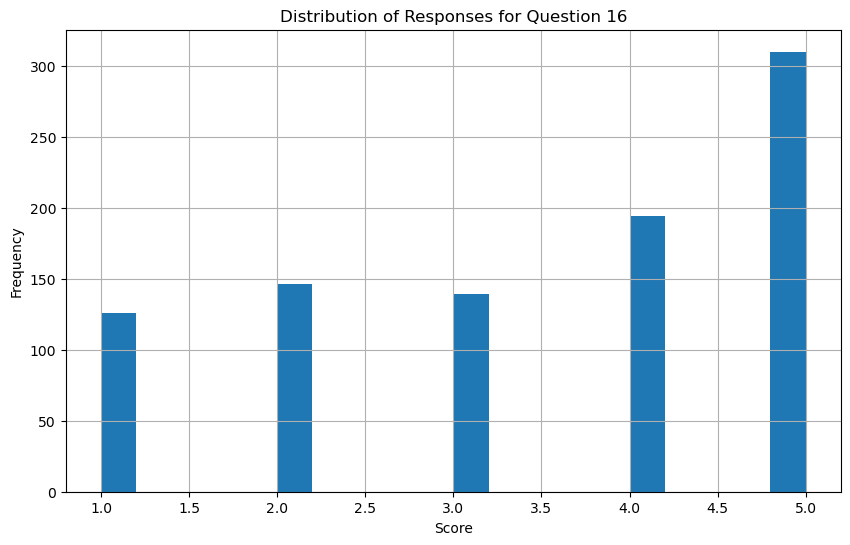

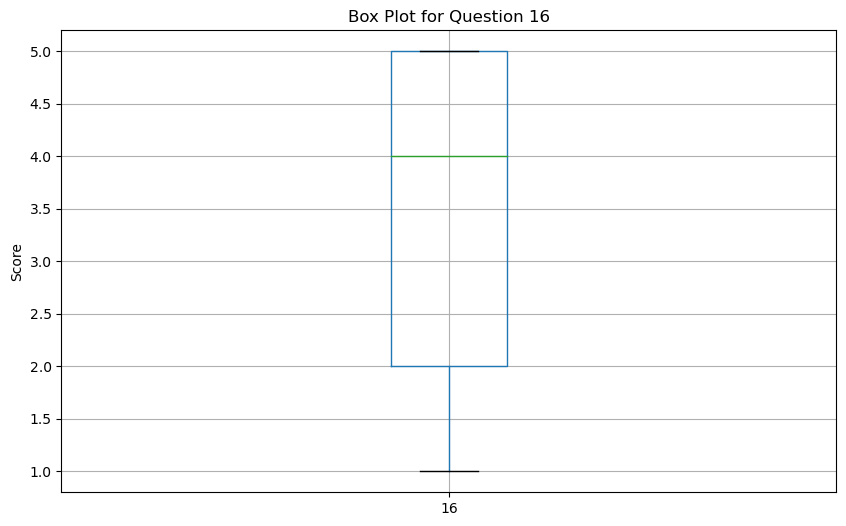

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['16'].hist(bins=20)
plt.title('Distribution of Responses for Question 16')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
data.boxplot(column=['16'])
plt.title('Box Plot for Question 16')
plt.ylabel('Score')
plt.show()

In [26]:
specialty_grouped = data.groupby('speciality').mean()
print(specialty_grouped)

                                                     1         2         3  \
speciality                                                                   
Акушер-гинеколог                              4.166667  4.404762  4.023810   
Аллерголог-иммунолог                          4.714286  4.571429  2.000000   
Анестезиолог-реаниматолог                     4.354839  4.225806  4.225806   
Вирусолог                                     1.000000  1.000000  1.000000   
Врач ЛФК и спортивной медицины                4.625000  3.625000  2.250000   
Врач УЗИ                                      4.333333  3.416667  4.708333   
Врач клинической лабораторной диагностики     3.238095  3.333333  2.952381   
Врач общей практики (семейная медицина)       4.111111  4.222222  2.666667   
Врач скорой помощи                            4.285714  4.142857  3.047619   
Врач функциональной диагностики               3.666667  3.333333  3.333333   
Врач-бактериолог                              2.500000  2.500000

let's find correllations:

In [27]:
correlations = data.corr()
print(correlations)

            1         2         3         4         5         6         7  \
1    1.000000  0.507050  0.106147  0.030478 -0.074912  0.015875  0.126309   
2    0.507050  1.000000  0.152583  0.055090  0.081969  0.158318  0.303574   
3    0.106147  0.152583  1.000000  0.656452  0.574465  0.534091  0.320072   
4    0.030478  0.055090  0.656452  1.000000  0.521236  0.493075  0.303186   
5   -0.074912  0.081969  0.574465  0.521236  1.000000  0.664883  0.470565   
6    0.015875  0.158318  0.534091  0.493075  0.664883  1.000000  0.523672   
7    0.126309  0.303574  0.320072  0.303186  0.470565  0.523672  1.000000   
8   -0.040136 -0.031189 -0.176661 -0.096618 -0.201076 -0.206603 -0.087350   
9    0.327240  0.402439  0.194646  0.085289  0.174237  0.205632  0.287363   
10  -0.080758 -0.073830  0.087962  0.151350  0.137175  0.117350  0.067662   
 11  0.173617  0.194081  0.193283  0.234173  0.222236  0.211917  0.193330   
12   0.185361  0.197993 -0.117186 -0.074603 -0.195664 -0.162970 -0.008814   

In order to work with them, I'll do a heatmap

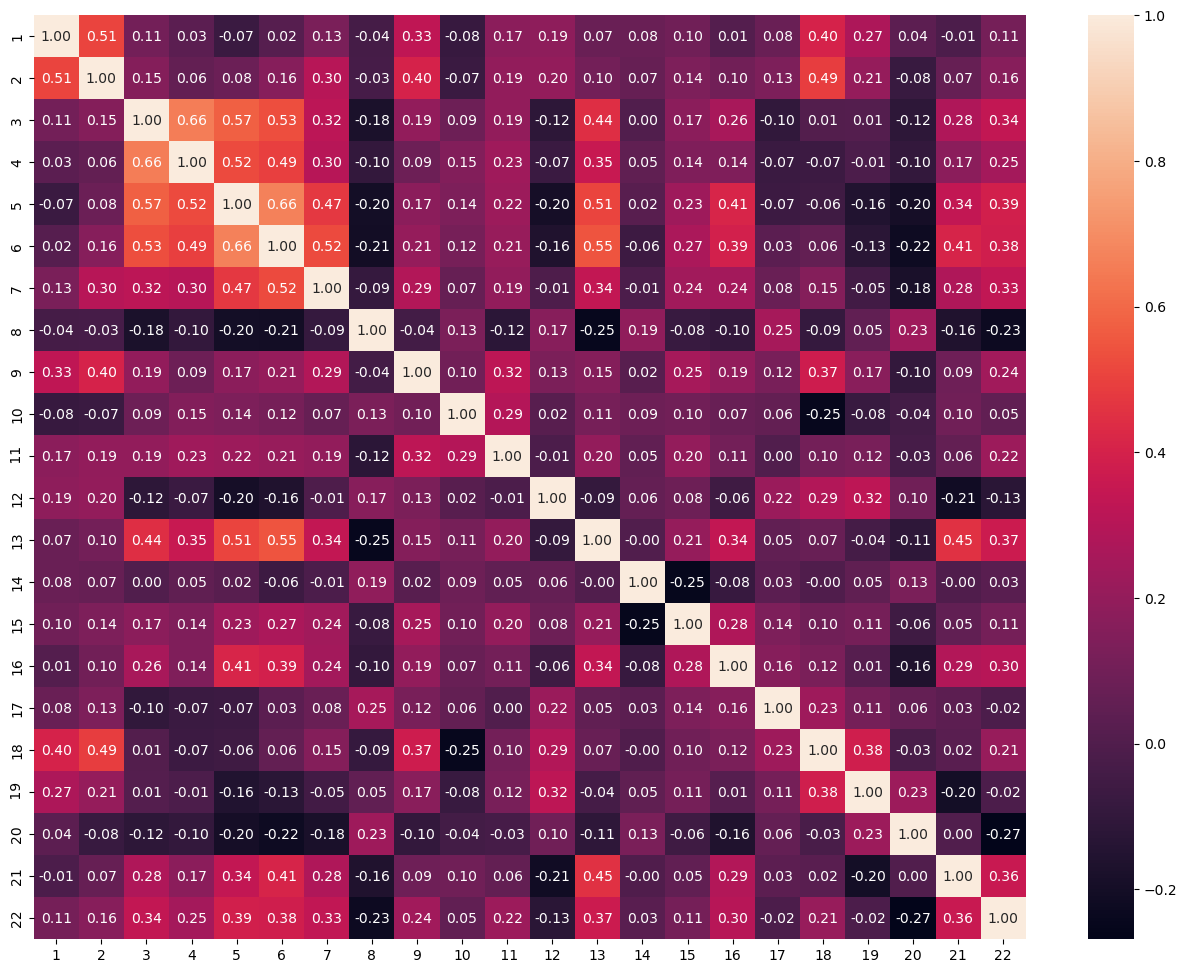

In [28]:
import seaborn as sns

plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

Here we can see some question with strong positive correlation. For example, 13 and 6 with corr 0.55: 

_6. Врачу приходится выдерживать тяжелые физические нагрузки или проводить манипуляции, требующие большой грубой силы

_13. Врач должен долгое время проводить стоя	

And about negative correlation - 8 and 13 (-0.25) and 20 and 22 (-0.27):

_8. Врач проводит большую часть дня сидя на одном месте	
_13. Врач должен долгое время проводить стоя	

_20. Врач работает по предсказуемому и постоянному графику	
_22. Работа предполагает ночные регулярные ночные или суточные смены	

Another interesting find is question with close-to-zero correlation:

_10. Врач помогает другому специалисту в постановке диагноза или проведении процедур, но сам не является лечащи	
_12. Врач ведет одного и того же пациента длительное время: примерно год и более	

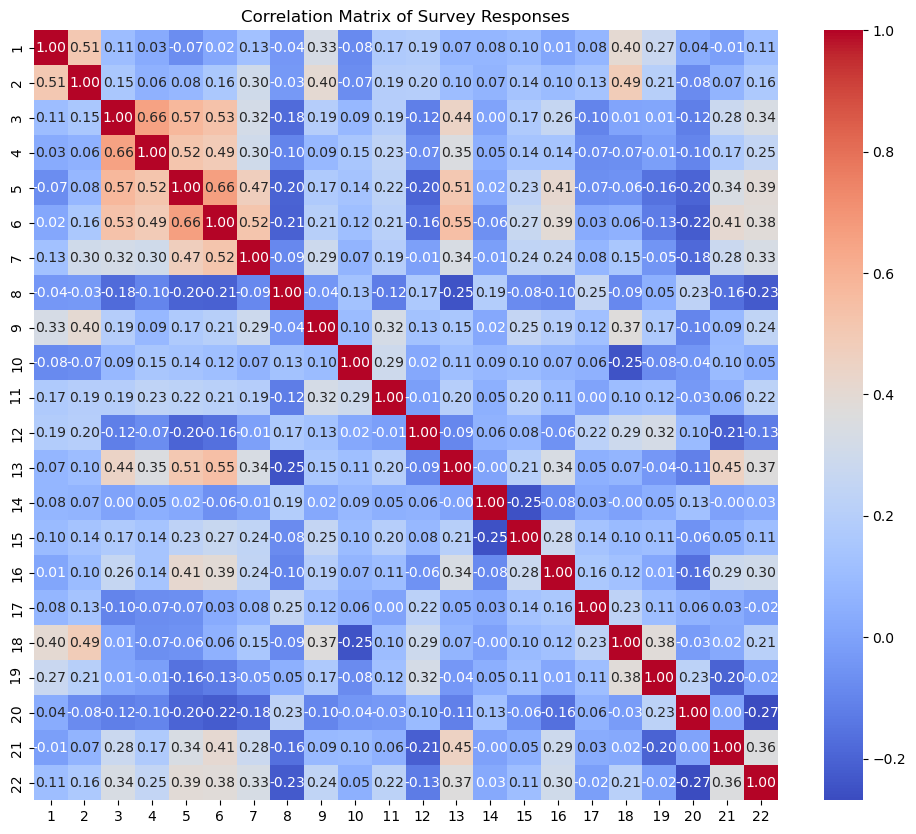

In [34]:
corr = data.iloc[:, :].corr()  # to adjust columns if needed

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Survey Responses")
plt.show()

Just for fun - let's make wordcloud

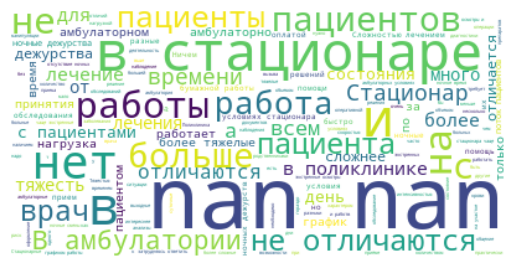

In [32]:
from wordcloud import WordCloud

word_data = pd.read_csv(file_path, skiprows=2, names=column_names)
text = " ".join(response for response in word_data['comment - skip'].astype(str))
wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Some DS and ML

## PCA - principal component analysis
Reduce the dimensionality of your survey data to identify the main factors that explain the most variance in responses. This can give you insights into underlying patterns in how different specialties view their profession.

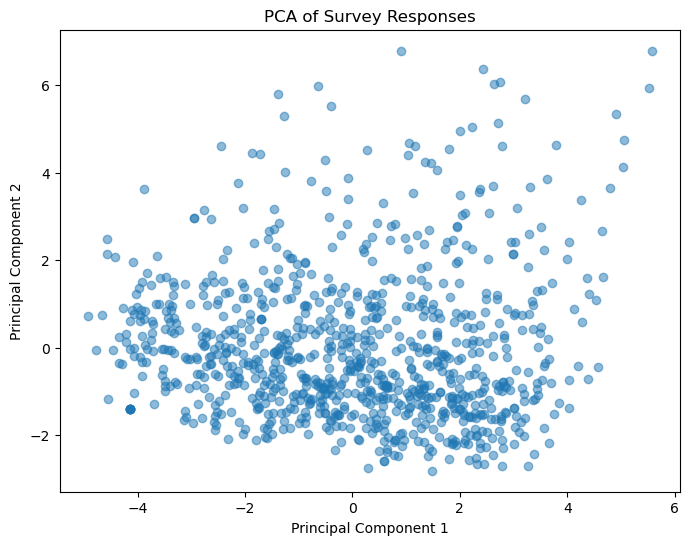

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
features = data.iloc[:, 1:]  # Adjust as necessary
features_standardized = StandardScaler().fit_transform(features.fillna(0))  # Fill NA values if necessary

# Apply PCA
pca = PCA(n_components=2)  # Adjust n_components as you see fit
principalComponents = pca.fit_transform(features_standardized)

# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Survey Responses')
plt.show()

Pretty uninformative - let's try dig deeper into PCA. Let's plot scree plot to understand underlying variances in first two components

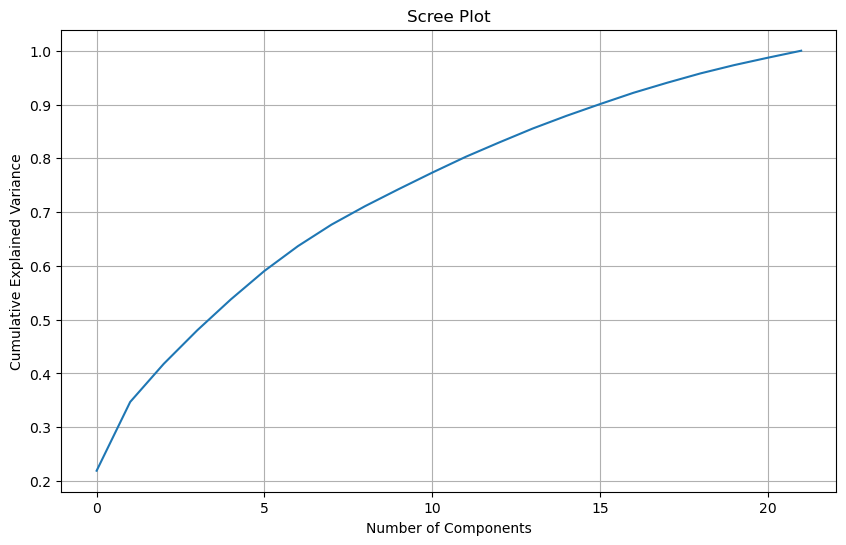

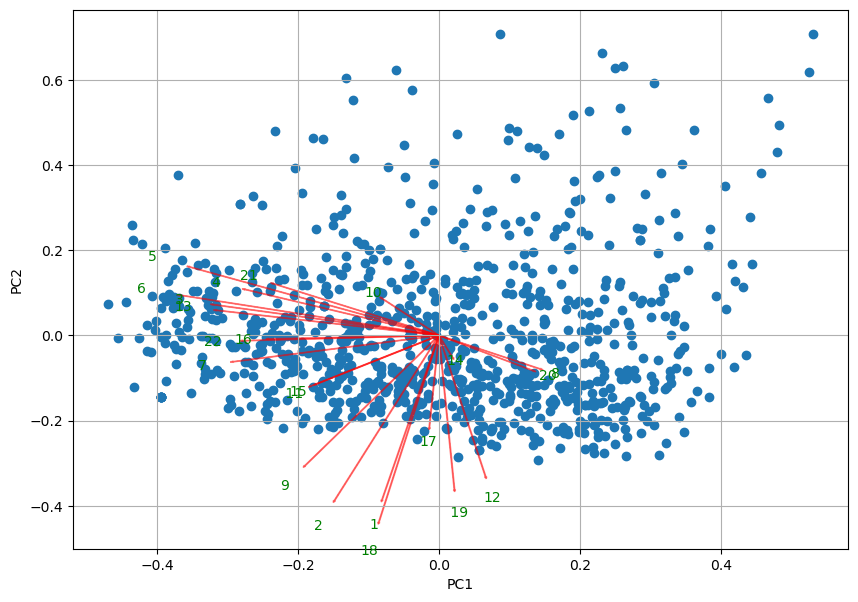

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'features' is your DataFrame of survey responses
features_standardized = StandardScaler().fit_transform(features.fillna(0))

pca = PCA()
principalComponents = pca.fit_transform(features_standardized)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Plot the first two principal components in a biplot (if applicable)
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.figure(figsize=(10, 7))
biplot(principalComponents[:,0:2], np.transpose(pca.components_[0:2, :]), labels=features.columns)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


/Users/alexander/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


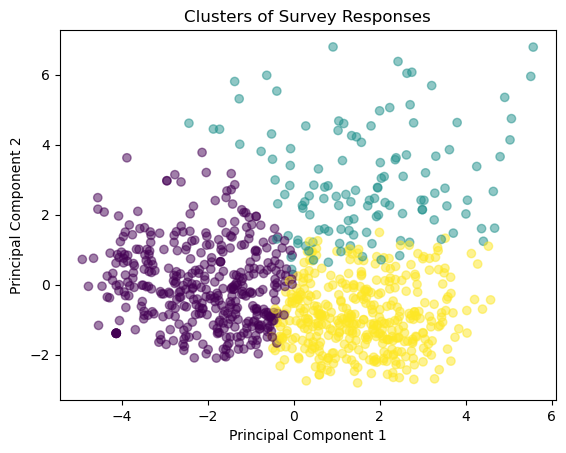

In [47]:
from sklearn.cluster import KMeans

# Example: clustering based on the first two principal components
kmeans = KMeans(n_clusters=3, random_state=0)  # Adjust n_clusters as necessary
clusters = kmeans.fit_predict(principalComponents)

# Plot the clusters
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=clusters, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters of Survey Responses')
plt.show()


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Prepare your feature matrix X and target vector y
X = features_standardized  # The feature matrix
y = data['speciality'].values  # The target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
print("Accuracy on test set:", clf.score(X_test, y_test))


Accuracy on test set: 0.3527272727272727
